In [1]:
from mlp import train, predict, Dense, Activation, predict_with_layer_value
from activation_functions import Tanh
from mse import mse, mse_derivative
import utils
from data.font import fontDict
from main import visualize_results, plot_latent_space
import numpy as np
import matplotlib.pyplot as plt


In [2]:
bitmapDict = utils.fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))
X

array([[[0],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [1]],

       [[1],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]],

       ...,

       [[0],
        [1],
        [1],
        ...,
        [1],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]])

In [6]:
autoencoder = [
    Dense(35, 20, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(20, 10, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(10, 2, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(2, 10, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(10, 20, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(20, 35, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
]
train(autoencoder, mse, mse_derivative, X, X, epochs=1000, verbose=False)
latent_space = [predict_with_layer_value(autoencoder, x, 5) for x in X]

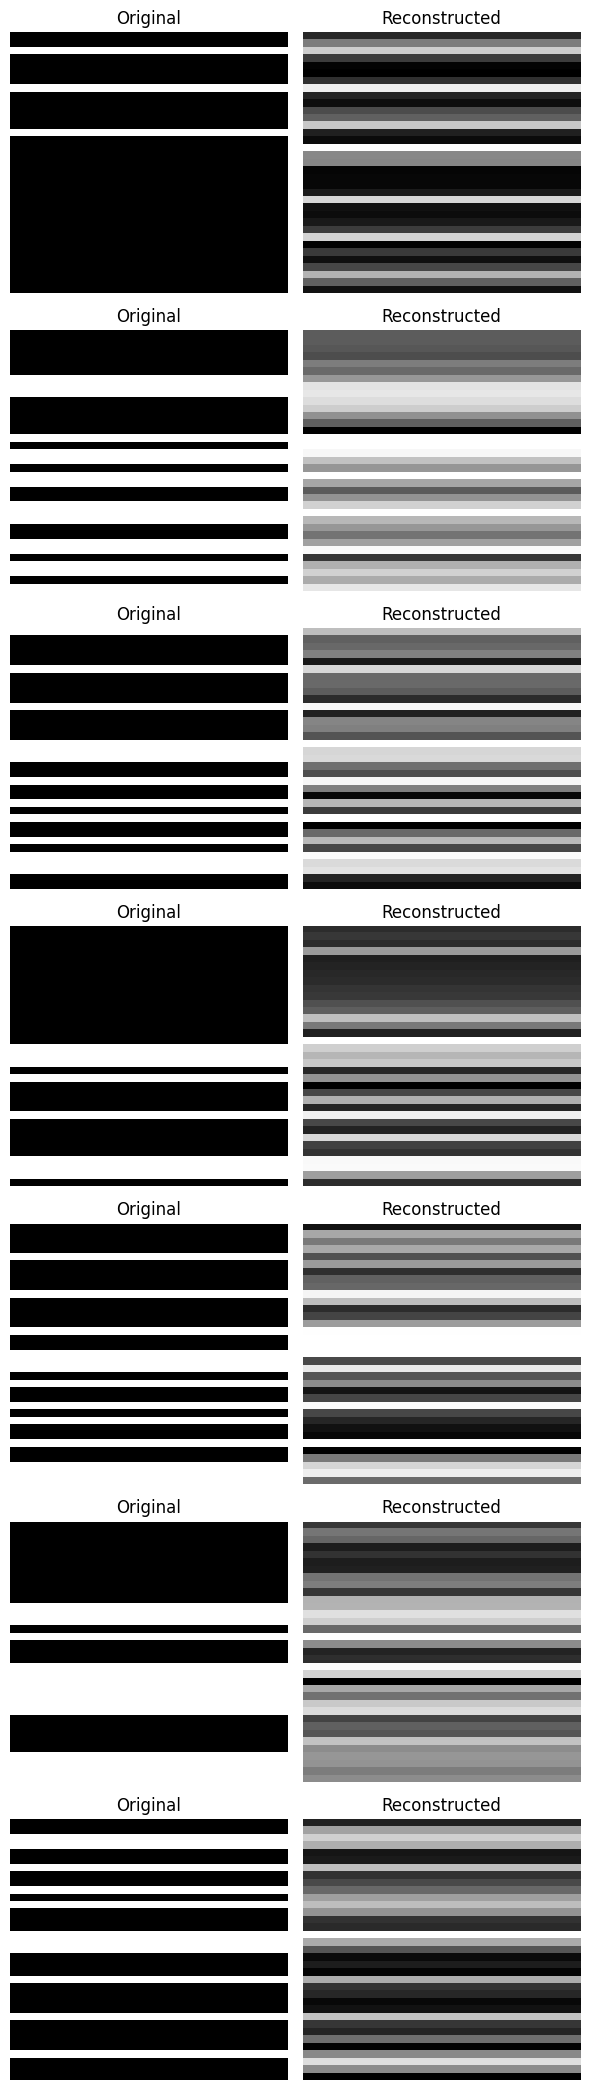

In [7]:
visualize_results(X, latent_space, num_samples=7)


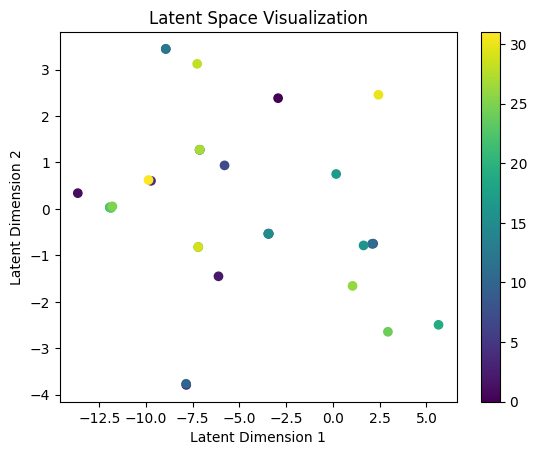

In [8]:
plot_latent_space(latent_space, labels=np.arange(len(X)))